In [24]:
#Compare HDM4 and Austroads deterioration equations

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


In [57]:
#HDM4
#Progression of potholes
ppt = 10 #percentage of potholes to patch
TLF = 0.5 #effects of pothole patching frequency (0<TLF<1)
Kpp = 1
ADIS = 10 #percentage are of wide structural cracking at the start of the analysis year or %area of ravelling or number of existing potholes
PEFF = 1 - ((ppt/100)*(1-TLF))#patching policy factor for distress type
ELANES = 2 #number of lanes for road section
a0pp = 0.5 #Assume cause of pothole is cracking
a1pp = 1
a2pp = 1
a3pp = 0.005
a4pp = 0.08
CDB = 0.5 #construction defects indicator for the base. assume poor gradation of material
YAX = 0.5 #annual number of axles of all motorised vehicle types in the analysis year
Prp = 42.77
HS = 40 #thickness of bituminous surfacing
dNPT = Kpp*a0pp*ADIS*PEFF*(ELANES/2)*((1+a1pp*CDB)*(1+a2pp*YAX)*(1+a3pp*Prp)/(1+a4pp*HS))
print(dNPT)

3.0888147321428576


In [58]:
#HDM4
#Progression of potholes
ppt = 10 #percentage of potholes to patch
TLF = 0.5 #effects of pothole patching frequency (0<TLF<1)
Kpp = 1
ADIS = 10 #percentage are of wide structural cracking at the start of the analysis year or %area of ravelling or number of existing potholes
PEFF = 1 - ((ppt/100)*(1-TLF))#patching policy factor for distress type
ELANES = 2 #number of lanes for road section
a0pp = 0.5 #Assume cause of pothole is cracking
a1pp = 1
a2pp = 1
a3pp = 0.005
a4pp = 0.08
CDB = 0.5 #construction defects indicator for the base. assume poor gradation of material
YAX = 0.5 #annual number of axles of all motorised vehicle types in the analysis year
Prp = 95
HS = 40 #thickness of bituminous surfacing
dNPT2 = Kpp*a0pp*ADIS*PEFF*(ELANES/2)*((1+a1pp*CDB)*(1+a2pp*YAX)*(1+a3pp*Prp)/(1+a4pp*HS))
print(dNPT2)

3.753348214285714


In [60]:
#HDM4 & Austroads inputs

#Shared components
A = np.arange(1, 12, 1) #Age of pavement with 1 for analysis year
year = [2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033]
#Y = [0.75, 0.80, 0.89, 0.99, 1.09, 1.21, 1.33, 1.45, 1.58, 1.73, 1.90] #ESAL from Vyas et al (2020)
Y = [0.30, 0.33, 0.37, 0.41, 0.46, 0.51, 0.56, 0.62, 0.69, 0.77, 0.85]#assume an 11±% increment
S = [5.80, 5.50, 5.46, 5.40, 5.31, 5.23, 5.16, 5.13, 5.11, 5.10, 5.09] #Adjusted structural number
D0 = [((3.2/s2)**(1/0.63))*1000 for s2 in S] #Deflection from Benkelman
#D0 = 600
#M = np.array([69.27, 62.29, 64.83, 64.98, 67.29, 66.27, 55.32, 55.70, 83.30, 74.82])
M = 66.41 #TMI for study area
m = 0.0197+(0.0000155* M)#environmental coefficient used in Austroads calculations
M2 = 120 #Compare with  
mx = 0.0197+(0.0000155* M2)

m1 = 0.025 #environmental coefficient use din HDM4 calculations
m2 = 0.030


#HDM-4 only
#Pavement = Asphalt mix on stabilised base (AMSB)
Kcia = 0.8 # Cracking initiation Vyas et al 
Kcpa = 0.69 #cracking progression
Kvi = 0.27 #ravelling initiation
kvp = 0.42 #ravelling progression
kpi = 0.45 #pothole initiation
kgm = 0.4 #roughness progression
#Check SNP on page C2-14

#PREDICT CRACKING
#HDM4
#Area of Structural cracking (ACA)
a0ps = 2.13 #Assumed pavement is AMSB
a1ps = 0.35
CRT = 0 #crack retardation time due to maintenance (years). assuming no maintennace works
CRP = 1 - 0.12 * CRT #retardation of cracking progression due to preventative treatment, given by CRP = 1 - 0.12 CRT
CDS = 1 #construction defects indicator for bituminous surfacings. Assuming normal therefore 1.0. Refer C2-20
dta = 1 #if ACAa > 0, then dta =1. dta - fractiom of analysis year in which All structural cracking progression applies
Kcpa = 0.69 #cracking progression calibration from Vyas et al 
ACTa = 0 # intial area of thermal transverse cracking
ACTa2 = 0
NCTeq = 0 #Tropical (warm temperatures in small ranges 20 -35C). Check C2-28
NCTa = 0 #number of transverse thermal cracks at teh start of the analysis year
CCT = 100 #Humid and Sub-tropical. Check C2-28
a0tt = 1 #initiation of thermal cracking
Kcit = 0.8 #calibration factor for progression of transverse thermal cracking
Teq = 7 #Assume subtropical. Check C2-28

# Initial value of ACAa
ACAa = 0 #% area of all structural cracking at the start of the analysis year
ACAa2 = 0
#Austroads
Kc = 1#calibration coefficient
Tmin = 10.51 #Minimum temperature in study area in C
Tmax = 18.71 #Maximum temperature in study area in C
T = (Tmin+Tmax)/2
R = 8 #Risk factor Between 1 to 10 
D = 8 #ARRB Durability test results (days usually taken as 8 to 10)
s = 20 #nominal size of seal (mm)
#SL = ((0.58*Tmin-0.107*R+0.84)/(0.0498*T-0.0216*D- 0.000381*s**2))**2
#Cage = a - SL for a in A
    
#RUTTING
a0r = 51740 #Pavement type AMSB check page C2-50
a1r = 0.09
a2r = 0.0384
a3r = -0.502
a4r = -2.3
Krid = 1 #Calibration for initial densification
DEF = [6.5 * (s1 ** -1.6) for s1 in S] #Average annual Benkelman beam deflection (mm)
COMP = 90 #relative compaction (%)
a0rc = 44950
a0rcc = 0.0000248
a1rc = -1.14
a1rcc = -0.84
a2rc = 0.11
a2rcc = 0.14
a3rc = -2.3
a3rcc = 1.07
a4rcc = 1.11
Prp = 42.77 #mm/month mean monthly rainfall in study area
Prp2 = 95
Krst = 1.0 #calibration factor for 
Krpd = 1.0
a0rp = 0.3 #Assume surface type AM Asphaltic mix
a1rp = 3.27
a2rp = -0.78
a3rp = 0.71
Sh = 40 #speed of heavy vehicles Km/h
HS = 40 #total thickness of bituminous surfacing. Assume a pavement from OR T3 = 0.7-1.5 mesa and S3 = 5-2 CBR strength. Wearing. corse = 40m, Base = 200mm, Subbase = 275mm
HSLIM = 40 #maximum thickness of bituminous surfacing in which plastic flow effects develop (default = 100mm)

rpf = 2.06 #cracked single seal. Austroads manual on rutting
Kr = 1 #calibration factor. Default - 1

kg = 1 #calibration factor for structural component of roughness
a = 134 # Coefficient values for roughness for structural component. Use 134 as a default. Vol 4 pg C2-59 HDM-4

km = 0.025 #calibration factor for environmental coefficient
#A = 5 # pavement age since last overlay (rehab, reconstruc, etc) in years

#S = 20 #adjusted structural number of pavement due to cracking at the end of the analysis year
#i = 2 #number of base and surfacing layers
#a_i for base is calculated as (29.14CBR - 0.1977CBR**2 + 0.00045 CBR**3)*10**-4 for Granular Base
#a_i = [0.30 0.1019 0.32] #layer coefficient for base or surfacing layer i for season s. C2-13 Vol.4 HDM4
#h_i = [40 400 125] # thickness of base or surfacing layer i (mm)
#sum_base = np.sum(np.array(a_i) * np.array(h_i))
#SNU = 0.0394 * sum_base # C2-12 in HDM4 Vol 4
#aj = 0.14 # layer coefficient for sub-base or selected fill layer j in season s. Take Cemented UCS for sub-base
#zj = [0 225] # depth of the underside of the jth layer (z0 = 0)mm
#zj1 = [0 0] #depth of the underside of the layer before the jth layer
#bo = 1.6
#b1 = 0.6
#b2 = 0.008
#b3 = 0.00207
#SNa = np.sum(bo * np.exp (-b3*np.array(zj)/-b3)
#SNb = np.sum(b1 * np.exp(-(b2+b3)*np.array(zj)/(b2+b3))
#SNc = np.sum(bo *np.exp(-b3 *zj1)/-b3)
#SNd = np.sum(b1*np.exp(-(b2+b3)*zj1)/(b2+b3))
#sum_subbase = np.sum(np.array(SNa) + np.array(SNb) - (np.array(SNc) + np.array(SNd))
#SNA = 0.034 * aj * sum_subbase
#zm = 600 #Thickness of soil layer (mm) with the stated CBR. (I think!!!)
#CBR = 50 #assumed to be 50 so will use default coefficients
#SNG = (bo - b1 * np.exp(-b2 * zm))* (np.exp(-b3*zm))* ((3.51*np.logCBR) - (0.85*np.logCBR)**2 - 1.43)
#S = SNU + SNA + SNG - 1.43



RI_a = 4.21 #roughness at the start of the analysis year
Ro = RI_a #initial roughness at AGE = 0 

kc = 1 #calibration factor for the cracking component of roughness
a0 = 0.0066 # Coefficient values for roughness for cracking component. Use 0.0066 as a default


kr = 1 #calibration factor for rutting component
a1 = 0.088 #Coefficient values for roughness for rutting component. Use 0.088 as a default. Vol 4 pg C2-59


kp = 1 #calibration factor for potholing component of roughness
CW = 10 #carriageway width
F = 1.5
#F = (max{min[0.25(CW-3), 1], 0}){max[(1 - Y/5000),0]} #freedom of manoeuvre
#Ppt = 60 #percentage of potholes to patch over the year
#Fpat = 100 #number of days between two patching campaigns (365/Fpat is an integer)
#Nb = 20 #number of potholes per km at the end of the analysis year including potholes patched during the analysis year
#PATQ = Nb * (Ppt/100) * (Fpat/365) #patching quantity at each patching campaign
#Nay = Nb * (1-Ppt/100) #number of potholes per km at the start of the year following the analysis year
#Ne = Nay + PATQ #number of potholes per km at the end of the analysis year
#Ns = 0 #number of potholes per km at the start of the analysis year
Ne = np.array([0, 12, 15, 17, 20, 28, 35, 41, 47, 49, 50]) #number of potholes per km at the end of the analysis year
Ns = np.array([0, 0, 12, 15, 17, 20, 28, 35, 41, 47, 49])#number of potholes per km at the start of the analysis year
Ne2 = np.array([0, 12, 16, 20, 24, 29, 36, 44, 48, 52, 56]) #number of potholes per km at the end of the analysis year
Ns2 = np.array([0, 0, 12, 16, 20, 24, 29, 36, 44, 48, 52])#number of potholes per km at the start of the analysis year

a2 = 0.00019 #Coefficient values for roughness for potholing component.Vol 4 pg C2-59
a3 = 2.0 #Coefficient values for roughness for potholing component.Vol 4 pg C2-59
a4 = 1.5 #Coefficient values for roughness for potholing component.Vol 4 pg C2-59

#Austroads only
rf = 1 #roughness relative performance factor for maintenance treatment (default = 1 double/double seal) 
ki = 1 #calibration coefficient for local roughness conditions (default = 1)
a5 = 73.14# Coefficient values for roughness for structural component. Use 73.14 for sprayed seal and thin asphalt <40mm
B = 5 #pavement age (years)
Do = 250 #design maximum deflection (micron)


a6 = 0.035# Coefficient values for roughness for cracking component. Use 0.035 for sprayed seal and thin asphalt <40mm
#crx = A_cr #cumulative cracking (% total lane area)


a7 = 0.24 #Coefficient values for roughness for rutting component. Use 0.24 for sprayed seal and thin asphalt <40mm
#rut = RDs #change in rut depth


a8 = 0.608 #Coefficient values for roughness for environmental component. Use 0.608 for sprayed seal and thin asphalt <40mm


In [40]:
#Calculate seal age for cracking calculation in  Austroads

# Calculate SL
SL = ((0.58 * (Tmin - 0.107) * (R + 0.84)) / (0.0498 * (T - 0.0216) * (D - 0.000381) * s ** 2)) ** 2

# Calculate Cage for each element in A
Cage = [ag - SL for ag in A]

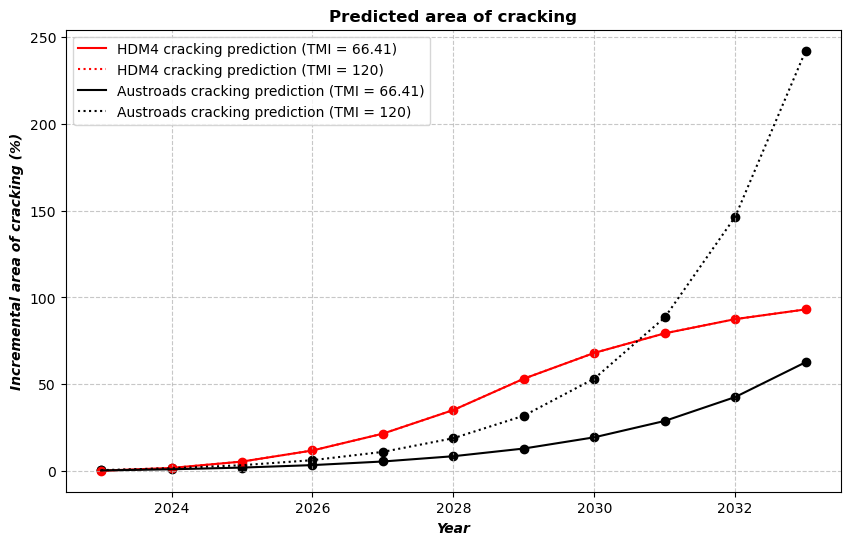

In [41]:
#Predict area of cracking

#HDM4 cracking for TMI = 66.41
ACA_values = []  # All Structural cracking
ACT_values = [] #Thermal transverse cracking
AC_values = [] #Total cracking

# Iteration over the years
for current_year in year:
    # ACA Calculation
    Za = -1 if ACAa >= 50 else 1
    SCA = min(ACAa, 100 - ACAa)
    y = a0ps * a1ps * Za * dta + (SCA ** a1ps)
    dACA = 0 #if y>0 then use this equation
    if y > 0:
        dACA = Kcpa * (CRP / CDS) * Za * (y ** (1 / a1ps) - SCA)
    else:
        dACA = Kcpa * (CRP / CDS)*(100-ACAa)
    ACA = ACAa + dACA
    ACA_values.append(ACA)
    ACAa = ACA
    # ACT Calculation
    esal_value = Y[current_year - year[0]]  # Get ESAL value for the current year
    ICT = Kcit * max(a0tt, (CDS * CCT))
    dNCT = Kcpa * (1 / CDS) * (max(0, min((NCTeq - NCTa), (2 * NCTeq * (esal_value - ICT - 0.5) / (Teq ** 2))))) * dta
    dACT = dNCT / 20 #incremental chnage in area of transverse thermal cracking during analysis year
    ACT = ACTa + dACT
    ACT_values.append(ACT)
    ACTa = ACT
    # AC Calculation
    AC = ACA + ACT
    AC = min(AC, 100)  # Cap the AC value at 100
    AC_values.append(AC)

#HDM4 cracking for TMI = 120
ACA2_values = []  # All Structural cracking
ACT2_values = [] #Thermal transverse cracking
AC2_values = [] #Total cracking

# Iteration over the years
for current_year2 in year:
    # ACA Calculation
    Za2 = -1 if ACAa2 >= 50 else 1
    SCA2 = min(ACAa2, 100 - ACAa2)
    y2 = a0ps * a1ps * Za2 * dta + (SCA2 ** a1ps)
    dACA2 = 0 #if y>0 then use this equation
    if y2 > 0:
        dACA2 = Kcpa * (CRP / CDS) * Za2 * (y2 ** (1 / a1ps) - SCA2)
    else:
        dACA2 = Kcpa * (CRP / CDS)*(100-ACAa2)
    ACA2 = ACAa2 + dACA2
    ACA2_values.append(ACA2)
    ACAa2 = ACA2
    # ACT Calculation
    esal_value = Y[current_year - year[0]]  # Get ESAL value for the current year
    ICT2 = Kcit * max(a0tt, (CDS * CCT))
    dNCT2 = Kcpa * (1 / CDS) * (max(0, min((NCTeq - NCTa), (2 * NCTeq * (esal_value - ICT2 - 0.5) / (Teq ** 2))))) * dta
    dACT2 = dNCT2 / 20 #incremental chnage in area of transverse thermal cracking during analysis year
    ACT2 = ACTa2 + dACT2
    ACT2_values.append(ACT2)
    ACTa2 = ACT2
    # AC Calculation
    AC2 = ACA2 + ACT2
    AC2 = min(AC2, 100)  # Cap the AC value at 100
    AC2_values.append(AC2)   
    
    
    #AUSTROADS fp rTMI = 66.41
ACr_values = []  

for i, a in enumerate(A):
    ACr = Kc * (np.exp(0.227 * Cage[i] * (100 + M) / 100) - 1)
    ACr_values.append(ACr)
    
    #AUSTROADS 2 for TMI = 120
ACr2_values = []  

for i, a in enumerate(A):
    ACr2 = Kc * (np.exp(0.227 * Cage[i] * (100 + M2) / 100) - 1)
    ACr2_values.append(ACr2)
    
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(year, AC_values, label="HDM4 cracking prediction (TMI = 66.41)", color='red')
plt.plot(year, AC2_values, label="HDM4 cracking prediction (TMI = 120)", color='red', linestyle='dotted')
plt.plot(year, ACr_values, label="Austroads cracking prediction (TMI = 66.41)", color='black')
plt.plot(year, ACr2_values, label="Austroads cracking prediction (TMI = 120)", color='black', linestyle='dotted')
plt.scatter(year, ACr_values, marker='o', color='black')
plt.scatter(year, ACr2_values, marker='o', color='black')
plt.scatter(year, AC_values, marker='o', color='red')
plt.xlabel("Year", fontstyle='italic', fontweight='bold')
plt.ylabel("Incremental area of cracking (%)", fontstyle='italic', fontweight='bold')
plt.title("Predicted area of cracking", fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Save the plot as a PNG image
plt.savefig("/Users/pamelaacheng/Library/CloudStorage/OneDrive-Nexus365/DPhil/2022/HDM4/TMI/Cracking2.png")

plt.show()


In [46]:
#Determine ACX for rutting equation
    #ACX is dependent on ACW and ACA
ACW_values = []
a0w = 3.67
a1w = 0.38
dtw = 1 #ACWa >0 dtw=1 otherwise dtw = max(0, (min(AGE2-ICW), 1))
ACWa = 0
Kcpw = 1
for current_year in year:
    Zw = -1 if ACWa >=50 else 1
    SCW = min(ACWa, 100-ACWa)
    yw = a0w*a1w*Zw*dtw + (SCW **a1w)
    if yw < 0:
        dACW = Kcpw * (CRP/CDS) *(min((ACAa+dACA-ACWa), (100-ACWa)))
    else:
        dACW = Kcpw * (CRP/CDS) *(min((ACAa+dACA-ACWa), Zw*(yw**(1/a1w)-SCW)))
    
    ACW = ACWa + dACW
    ACW_values.append(ACW)
    ACWa = ACW

In [47]:
ACXa = [0.62 * ac + 0.39 * acw for ac, acw in zip(AC_values, ACW_values)] #ACX = 0.62ACA + 0.39ACW

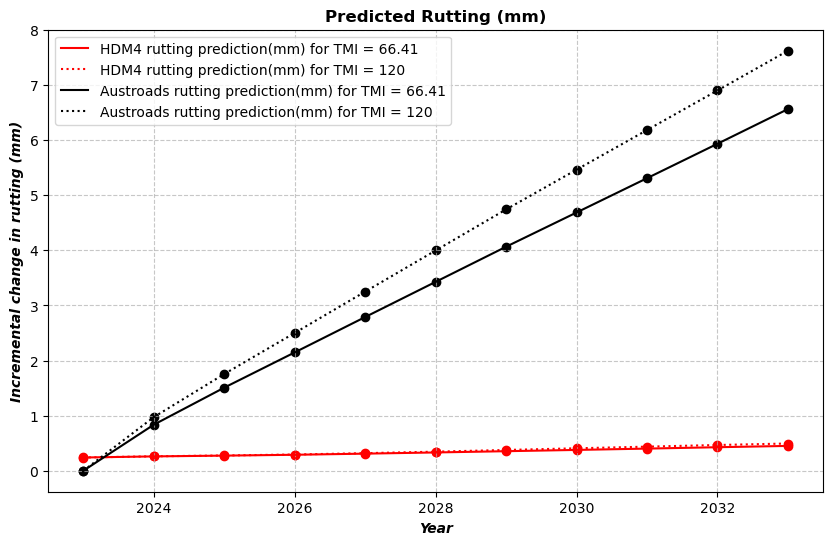

In [48]:
#Predict rutting
#HDM4 for TMI=66.41
RDO_values = [] # Rutting due to initial densification dependent on relative compaction of base, sub-base and selected SG layers
RDST_values = [] # Structural deformation
RDPD_values = [] # Due to plastic deformation in analysis year
RD_values = [] # Incremental increase in total mean rut depth (mm)
RDM_values = [] # Total mean rut depth in both wheel paths at the end of the analysis year

# Iteration over the years
for i, current_year in enumerate(year):
    # RDO Calculation #Initial densification only applies to new construction or reconstruction from A=0 to A=1.
    RDO = Krid * a0r * (S[i] ** a3r) * (COMP ** a4r) * ((Y[i] * 10**6)**(a1r + (a2r * DEF[i]))) 
    RDO_values.append(RDO)
    
    # RDST Calculation
    RDSTuc = Krst * a0rc * (S[i] ** a1rc) * (Y[i] ** a2rc) * (COMP ** a3rc) #without cracking if ACRA = 0
    RDSTcrk = Krst * a0rcc * (S[i] ** a1rcc) * (Y[i] ** a2rcc) * (Prp ** a3rcc) * (ACXa[i] ** a4rcc) #structural deformation after cracking
    RDST = RDSTuc + RDSTcrk
    RDST_values.append(RDST)

    # RDPD Calculation
    RDPD = Krpd * a0rp * (CDS ** a1rp) * Y[i] * (Sh ** a2rp) * ((min(HS, HSLIM)) ** a3rp)#generic plastic deformation equation
    RDPD_values.append(RDPD)
    
# RDM calculation (assuming A is defined and corresponds to each year)
#for i, a_value in enumerate(A):
    #if a_value <= 1:
        #RDM = RDO_values[i] + RDPD_values[i]
    #else:
        #RDM = RDST_values[i] + RDPD_values[i]
    RDM = RDST_values[i] + RDPD_values[i]
    #RDM = RDO_values[i] + RDPD_values[i]
    RDM_values.append(RDM)



    

    
#HDM4 for TMI = 120
RDO2_values = [] # Rutting due to initial densification dependent on relative compaction of base, sub-base and selected SG layers
RDST2_values = [] # Structural deformation
RDPD2_values = [] # Due to plastic deformation in analysis year
RD2_values = [] # Incremental increase in total mean rut depth (mm)
RDM2_values = [] # Total mean rut depth in both wheel paths at the end of the analysis year

# Iteration over the years
for i, current_year in enumerate(year):
    # RDO Calculation #Initial densification only applies to new construction or reconstruction from A=0 to A=1.
    RDO2 = Krid * a0r * (S[i] ** a3r) * (COMP ** a4r) * ((Y[i] * 10**6)**(a1r + (a2r * DEF[i]))) 
    RDO2_values.append(RDO2)
    
    # RDST Calculation
    RDSTuc2 = Krst * a0rc * (S[i] ** a1rc) * (Y[i] ** a2rc) * (COMP ** a3rc) #without cracking if ACRA = 0
    RDSTcrk2 = Krst * a0rcc * (S[i] ** a1rcc) * (Y[i] ** a2rcc) * (Prp2 ** a3rcc) * (ACXa[i] ** a4rcc) #structural deformation after cracking
    RDST2 = RDSTuc2 + RDSTcrk2
    RDST2_values.append(RDST2)

    # RDPD Calculation
    RDPD2 = Krpd * a0rp * (CDS ** a1rp) * Y[i] * (Sh ** a2rp) * ((min(HS, HSLIM)) ** a3rp)#generic plastic deformation equation
    RDPD2_values.append(RDPD2)
    
# RDM calculation (assuming A is defined and corresponds to each year)
#for i, a_value in enumerate(A):
    #if a_value <= 1:
        #RDM = RDO_values[i] + RDPD_values[i]
    #else:
        #RDM = RDST_values[i] + RDPD_values[i]
    RDM2 = RDST2_values[i] + RDPD2_values[i]
    #RDM = RDO_values[i] + RDPD_values[i]
    RDM2_values.append(RDM2)
    
    
    
    
    
    
#AUSTROADS for TMI = 66.41
#RDMr_values = []  

#for i, current_year in enumerate(year):
    # If D0 is a list, use D0[i], otherwise just use D0
    #D0_value = D0[i] #if isinstance(D0, list) else D0
    #RDMr = rpf * Kr * 0.177 * (A[i] - 1) ** 0.834 * (1 + (0.0000166 * D0_value * (100 + M)) + (0.371 * Y[i]))
    ##RDMr_values.append(RDMr)
    
RDMr_values = []
for i, current_year in enumerate(year):
    D0_value = D0[i] if isinstance(D0, list) else D0
    
    # Adjusting the formula to avoid invalid value errors
    if A[i] > 1:
        RDMr = rpf * Kr * 0.177 * ((A[i] - 1) ** 0.834) * (1 + (0.0000166 * D0_value * (100 + M)) + (0.371 * Y[i]))
    else:
        RDMr = 0  # Assuming no rutting for the first year or handling other specific cases

    RDMr_values.append(RDMr)


    
    
    
    
    
    #Austroads for TMI = 120
RDMr2_values = []
for i, current_year in enumerate(year):
    D0_value = D0[i] if isinstance(D0, list) else D0
    
    # Adjusting the formula to avoid invalid value errors
    if A[i] > 1:
        RDMr2 = rpf * Kr * 0.177 * ((A[i] - 1) ** 0.834) * (1 + (0.0000166 * D0_value * (100 + M2)) + (0.371 * Y[i]))
    else:
        RDMr2 = 0  # Assuming no rutting for the first year or handling other specific cases

    RDMr2_values.append(RDMr2)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(year, RDM_values, label="HDM4 rutting prediction(mm) for TMI = 66.41", color='red')
plt.plot(year, RDM2_values, label="HDM4 rutting prediction(mm) for TMI = 120", color='red', linestyle='dotted')
plt.plot(year, RDMr_values, label = "Austroads rutting prediction(mm) for TMI = 66.41", color='black')
plt.plot(year, RDMr2_values, label = "Austroads rutting prediction(mm) for TMI = 120", color='black', linestyle='dotted')
plt.scatter(year, RDM_values, marker='o', color='red')
plt.scatter(year, RDMr_values, marker='o', color='black')
plt.scatter(year, RDM2_values, marker='o', color='red')
plt.scatter(year, RDMr2_values, marker='o', color='black')
plt.xlabel("Year", fontstyle='italic', fontweight='bold')
plt.ylabel("Incremental change in rutting (mm)", fontstyle='italic', fontweight='bold')
plt.title("Predicted Rutting (mm)", fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Save the plot as a PNG image
plt.savefig("/Users/pamelaacheng/Library/CloudStorage/OneDrive-Nexus365/DPhil/2022/HDM4/TMI/Rutting3.png")

plt.show()


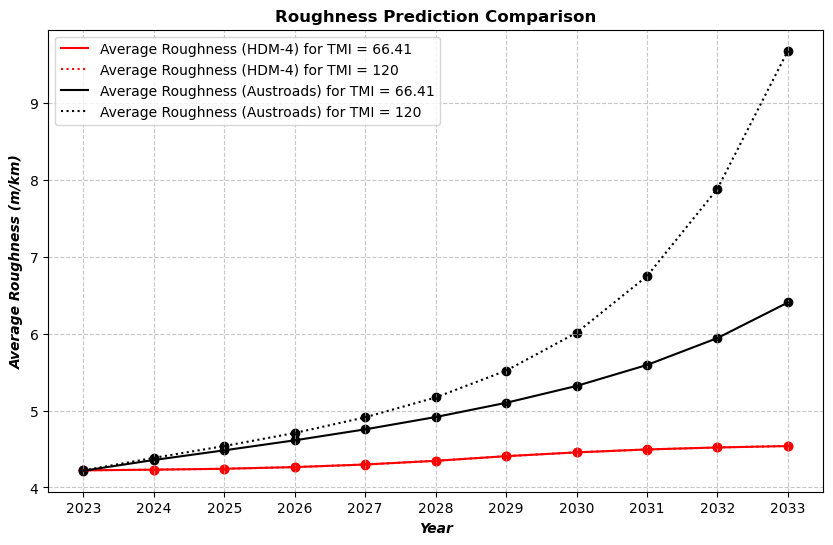

In [61]:
#Deterioration using HDM-4 and Austroads
A = np.arange(0, 11, 1) #Age of pavement with 1 for analysis year
year = [2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033]


#DETERIORATION USING HDM-4 equation for TMI = 66.41
# Calculate RI_s, RI_cr, RI_rut, and RI_p for each year
RI_s = []  # Initialize an empty list to store RI_s values for each year
RI_cr = []  # Initialize an empty list to store RI_cr values for each year
RI_rut = []  # Initialize an empty list to store RI_rut values for each year
RI_p = []  # Initialize an empty list to store RI_p values for each year
RI_env = []

for Year in A:
    S_age = S[int(Year)]  # Use the corresponding S value for the year
    #Ris = (kg * a * Y[int(Year)] * np.exp(m[int(Year)] * km * A[int(Year)])) / ((1 + S_age) ** 5)  # Incremental change in roughness due to structural components
    #Ris = (kg * a * Y[int(Year)] * np.exp(m * km * A[int(Year)])) / ((1 + S_age) ** 5)  # Using single HDM4 calculated from equation
    Ris = (kg * a * Y[int(Year)] * np.exp(m1 * km * A[int(Year)])) / ((1 + S_age) ** 5) #Using m in HDM4
    RI_s.append(Ris)  # Append the calculated RI_s to the list

    Ac_age = AC_values[int(Year)]  # Use the corresponding A_cr value for the year
    Rc = kc * a0 * Ac_age # Incremental change in roughness due to structural components
    RI_cr.append(Rc)  # Append the calculated RI_s to the list

    # Calculate SRD for each year based on RDM_values
    SRD = [(0.9 - 0.04 * rdm_value) * rdm_value for rdm_value in RDM_values] #Look at page C2-53 for the incremental rut depth standad deviation
    # Clip SRD values to a maximum of 0.3
    SRD = np.clip(SRD, None, 0.3)
    SRD_age = SRD[int(Year)]  # Use the corresponding S value for the year
        
    Rrut = kr * a1 * SRD_age #incremental change in roughness due to variation in rut depth
    RI_rut.append(Rrut)  # Append the calculated RI_s to the list

    RI_p.append(kp * a2 * (a3 - F) * ((Ne[int(Year)] ** a4) - (Ns[int(Year)] ** a4)))  # Incremental change in roughness due to potholing
    #RI_env.append(m[int(Year)] * km * RI_a)  # Incremental change in roughness due to environmental factors
    #RI_env.append(m * km * RI_a)  # Using single m value
    RI_env.append(m1 * km * RI_a) #Using HDM4 m value
# Convert the lists to NumPy arrays
RI_s = np.array(RI_s)
RI_cr = np.array(RI_cr)
RI_rut = np.array(RI_rut)
RI_p = np.array(RI_p)
RI_env = np.array(RI_env)
RI_a = 4.21

# Calculate the total roughness index for each year
total_RI = RI_a + RI_s + RI_cr + RI_rut + RI_p + RI_env

# Clip total_RI to a maximum value of 16
total_RI = np.clip(total_RI, None, 16)

#Average roughness
RI_av = 0.5 * (RI_a + total_RI)





#DETERIORATION USING HDM-4 equation for TMI = 120
# Calculate RI_s, RI_cr, RI_rut, and RI_p for each year
RI_s2 = []  # Initialize an empty list to store RI_s values for each year
RI_cr2 = []  # Initialize an empty list to store RI_cr values for each year
RI_rut2 = []  # Initialize an empty list to store RI_rut values for each year
RI_p2 = []  # Initialize an empty list to store RI_p values for each year
RI_env2 = []

for Year in A:
    S_age = S[int(Year)]  # Use the corresponding S value for the year
    Ris2 = (kg * a * Y[int(Year)] * np.exp(m2 * km * A[int(Year)])) / ((1 + S_age) ** 5) #Using m in HDM4
    RI_s2.append(Ris2)  # Append the calculated RI_s to the list

    Ac_age = AC_values[int(Year)]  # Use the corresponding A_cr value for the year
    Rc2 = kc * a0 * Ac_age # Incremental change in roughness due to structural components
    RI_cr2.append(Rc2)  # Append the calculated RI_s to the list

    # Calculate SRD for each year based on RDM_values
    SRD = [(0.9 - 0.04 * rdm_value) * rdm_value for rdm_value in RDM_values] #Look at page C2-53 for the incremental rut depth standad deviation
    # Clip SRD values to a maximum of 0.3
    SRD = np.clip(SRD, None, 0.3)
    SRD_age = SRD[int(Year)]  # Use the corresponding S value for the year
        
    Rrut2 = kr * a1 * SRD_age #incremental change in roughness due to variation in rut depth
    RI_rut2.append(Rrut2)  # Append the calculated RI_s to the list

    RI_p2.append(kp * a2 * (a3 - F) * ((Ne2[int(Year)] ** a4) - (Ns2[int(Year)] ** a4)))  # Incremental change in roughness due to potholing
    #RI_env.append(m[int(Year)] * km * RI_a)  # Incremental change in roughness due to environmental factors
    #RI_env.append(m * km * RI_a)  # Using single m value
    RI_env2.append(m2 * km * RI_a) #Using HDM4 m value
# Convert the lists to NumPy arrays
RI_s2 = np.array(RI_s2)
RI_cr2 = np.array(RI_cr2)
RI_rut2 = np.array(RI_rut2)
RI_p2 = np.array(RI_p2)
RI_env2 = np.array(RI_env2)
RI_a = 4.21
# Calculate the total roughness index for each year
total_RI2 = RI_a + RI_s2 + RI_cr2 + RI_rut2 + RI_p2 + RI_env2
# Clip total_RI to a maximum value of 16
total_RI2 = np.clip(total_RI2, None, 16)
#Average roughness
RI_av2 = 0.5 * (RI_a + total_RI2) 






#DETERIORATION USING AUSTROADS EQUATION for TMI = 66.41
# Calculate R_s, R_c, R_r, R_e, and total_R for each A value
R_s = []  # Initialize an empty list to store RI_s values for each year
R_c = []  # Initialize an empty list to store RI_cr values for each year
R_r = []  # Initialize an empty list to store RI_rut values for each year
R_e = []
for Year in A:
    S_age = S[int(Year)]  # Use the corresponding S value for the year
    rs = (rf * ki * a5 * Y[int(Year)] * A[int(Year)] * np.exp(m * A[int(Year)])) / ((1 + S_age) ** 5) # Incremental change in roughness due to structural components
    R_s.append(rs)  # Append the calculated rs to the list

    Acr_age = ACr_values[int(Year)]  # Use the corresponding A_cr value for the year
    rc = rf * ki * a6 * Acr_age # Incremental change in roughness due to structural components
    R_c.append(rc)  # Append the calculated RI_s to the list

    RDMr_age = RDMr_values[int(Year)]  # Use the corresponding S value for the year
    rr = rf * ki * a7 * RDMr_age #incremental change in roughness due to variation in rut depth
    R_r.append(rr)  # Append the calculated RI_s to the list

    #R_e.append(rf * ki * a8 * m[int(Year)] * A[int(Year)] * RI_a) # Incremental change in roughness due to environmental factors
    R_e.append(rf * ki * a8 * m * A[int(Year)] * RI_a)
# Convert the lists to NumPy arrays
R_s = np.array(R_s)
R_c = np.array(R_c)
R_r = np.array(R_r)
R_e = np.array(R_e)
R = R_s + R_c + R_r + R_e
total_R = RI_a + R
# Clip total_RI to a maximum value of 16
total_R = np.clip(total_R, None, 16)
#Average roughness
#R_av = 0.5 * (RI_a + total_R)
# Calculate average roughness, handling NaN values
R_av = np.where(np.isnan(total_R), RI_a, 0.5 * (RI_a + total_R))





#DETERIORATION USING AUSTROADS EQUATION for TMI = 120
# Calculate R_s, R_c, R_r, R_e, and total_R for each A value
R_s2 = []  # Initialize an empty list to store RI_s values for each year
R_c2 = []  # Initialize an empty list to store RI_cr values for each year
R_r2 = []  # Initialize an empty list to store RI_rut values for each year
R_e2 = []

for Year in A:
    S_age = S[int(Year)]  # Use the corresponding S value for the year
    rs2 = (rf * ki * a5 * Y[int(Year)] * A[int(Year)] * np.exp(mx * A[int(Year)])) / ((1 + S_age) ** 5) # Incremental change in roughness due to structural components
    R_s2.append(rs2)  # Append the calculated rs to the list

    Acr2_age = ACr2_values[int(Year)]  # Use the corresponding A_cr value for the year
    rc2 = rf * ki * a6 * Acr2_age # Incremental change in roughness due to structural components
    R_c2.append(rc2)  # Append the calculated RI_s to the list

    RDMr2_age = RDMr2_values[int(Year)]  # Use the corresponding S value for the year
    rr2 = rf * ki * a7 * RDMr2_age #incremental change in roughness due to variation in rut depth
    R_r2.append(rr2)  # Append the calculated RI_s to the list

    #R_e.append(rf * ki * a8 * m[int(Year)] * A[int(Year)] * RI_a) # Incremental change in roughness due to environmental factors
    R_e2.append(rf * ki * a8 * mx * A[int(Year)] * RI_a)
# Convert the lists to NumPy arrays
R_s2 = np.array(R_s2)
R_c2 = np.array(R_c2)
R_r2 = np.array(R_r2)
R_e2 = np.array(R_e2)

R2 = R_s2 + R_c2 + R_r2 + R_e2
total_R2 = RI_a + R2

# Clip total_RI to a maximum value of 16
total_R2 = np.clip(total_R2, None, 16)
#Average roughness
#R_av = 0.5 * (RI_a + total_R)
# Calculate average roughness, handling NaN values
R_av2 = np.where(np.isnan(total_R2), RI_a, 0.5 * (RI_a + total_R2))

# Plot both the "Deterioration using HDM-4" and "Deterioration using Austroads equation" on the same graph
plt.figure(figsize=(10, 6))
plt.plot(year, RI_av, label="Average Roughness (HDM-4) for TMI = 66.41", color='red')
plt.plot(year, RI_av, label="Average Roughness (HDM-4) for TMI = 120", color='red', linestyle='dotted')
plt.plot(year, R_av, label="Average Roughness (Austroads) for TMI = 66.41", color='black')
plt.plot(year, R_av2, label="Average Roughness (Austroads) for TMI = 120", color='black', linestyle='dotted')
plt.scatter(year, RI_av, marker='o', color='red')
plt.scatter(year, R_av, marker='o', color='black')
plt.scatter(year, RI_av2, marker='o', color='red')
plt.scatter(year, R_av2, marker='o', color='black')
plt.xlabel("Year", fontstyle='italic', fontweight='bold')
plt.ylabel("Average Roughness (m/km)", fontstyle='italic', fontweight='bold')
plt.title("Roughness Prediction Comparison", fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(min(year), max(year) + 1, 1))

# Save the plot as a PNG image
plt.savefig("/Users/pamelaacheng/Library/CloudStorage/OneDrive-Nexus365/DPhil/2022/HDM4/TMI/IRI_pred3.png")

plt.show()


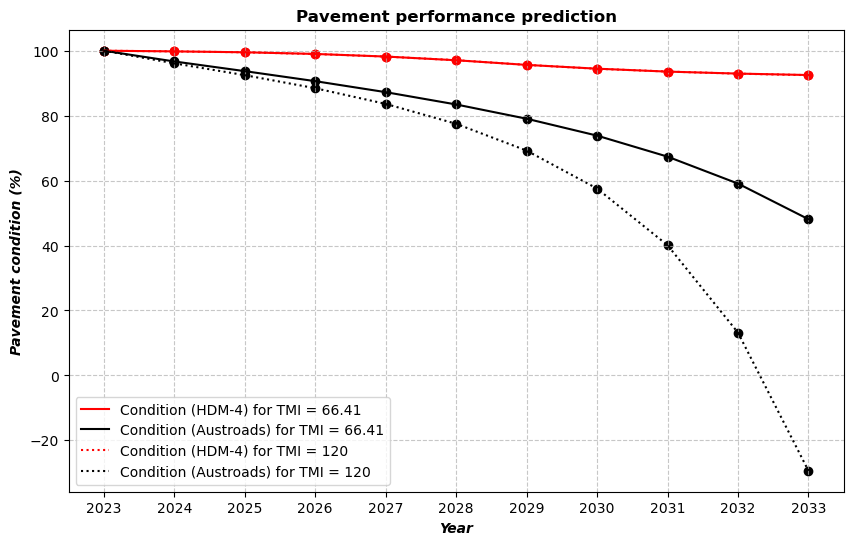

In [63]:
# Calculate the condition of the road as the percentage difference from the original roughness in 2016
c = ((R_av - R_av[0]) / R_av[0]) * 100
condition_aust = 100 - c

c1 = ((RI_av - RI_av[0]) / RI_av[0]) * 100
condition_hdm = 100 - c1

c2 = ((R_av2 - R_av2[0]) / R_av2[0]) * 100
condition_aust2 = 100 - c2

c3 = ((RI_av2 - RI_av2[0]) / RI_av2[0]) * 100
condition_hdm2 = 100 - c3

# Plot the condition of the road vs. time
plt.figure(figsize=(10, 6))

plt.plot(year, condition_hdm, label="Condition (HDM-4) for TMI = 66.41", color='red')
plt.plot(year, condition_aust, label="Condition (Austroads) for TMI = 66.41", color='black')
plt.plot(year, condition_hdm2, label="Condition (HDM-4) for TMI = 120", color='red', linestyle='dotted')
plt.plot(year, condition_aust2, label="Condition (Austroads) for TMI = 120", color='black', linestyle='dotted')
plt.scatter(year, condition_hdm, marker='o', color='red')
plt.scatter(year, condition_aust, marker='o', color='black')
plt.scatter(year, condition_hdm2, marker='o', color='red')
plt.scatter(year, condition_aust2, marker='o', color='black')
plt.xlabel("Year", fontstyle='italic', fontweight='bold')
plt.ylabel("Pavement condition (%)", fontstyle='italic', fontweight='bold')
plt.title("Pavement performance prediction", fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.xticks(range(min(year), max(year) + 1, 1))

# Save the plot as a PNG image
plt.savefig("/Users/pamelaacheng/Library/CloudStorage/OneDrive-Nexus365/DPhil/2022/HDM4/TMI/Performance_future3.png")


plt.show()

In [ ]:
# Plotting (optional)
plt.figure(figsize=(10, 6))
plt.plot(year, ACA_values, label="ACA", color='blue')
plt.plot(year, ACT_values, label="ACT", color='red')
plt.xlabel("Year")
plt.ylabel("Area of Cracking")
plt.title("Area of Cracking Over Years")
plt.legend()
plt.grid(True)
plt.show()

#Area of transverse thermal cracking (ACT)

#AC = ACA + ACT #Total area of cracking
dt = 1 #if ACTa > 0
ACTa = 5 # intial are of thermal transverse cracking
NCTeq = 100 #Subtropical. Check C2-28
NCTa = 4 #number of transverse thermal cracks at teh start of the analysis year
CCT = 100 #Humid and Sub-tropical. Check C2-28
a0tt = 1 #initiation of thermal cracking
Kcit = 0.8 #calibration factor for progression of transverse thermal cracking

ICT = Kcit * max(a0tt, (CDS*CCT))
Teq = 7 #Assume subtropical. Check C2-28
dNCT = Kcpa * (1/CDS)*(max(0, min((NCTeq - NCTa), (2*NCTeq *(Y - ICT - 0.5)/(Teq**2))))) * dt
dACT = dNCT/20 
ACT = ACTa + dACT

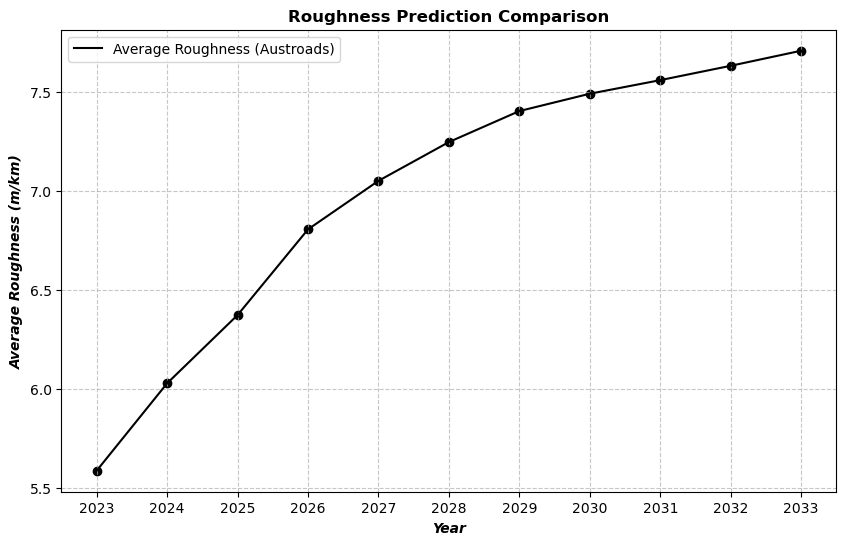

In [190]:
#Deterioration using HDM-4 and Austroads

#DETERIORATION USING HDM-4 equation
A = np.arange(0, 11, 1)
year = [2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033]

# Calculate RI_s, RI_cr, RI_rut, and RI_p for each year
RI_s = []  # Initialize an empty list to store RI_s values for each year
RI_cr = []  # Initialize an empty list to store RI_cr values for each year
RI_rut = []  # Initialize an empty list to store RI_rut values for each year
RI_p = []  # Initialize an empty list to store RI_p values for each year
RI_env = []

for Year in A:
    S_age = S[int(Year)]  # Use the corresponding S value for the year
    #Ris = (kg * a * Y[int(Year)] * np.exp(m[int(Year)] * km * A[int(Year)])) / ((1 + S_age) ** 5)  # Incremental change in roughness due to structural components
    #Ris = (kg * a * Y[int(Year)] * np.exp(m * km * A[int(Year)])) / ((1 + S_age) ** 5)  # Using single HDM4 calculated from equation
    Ris = (kg * a * Y[int(Year)] * np.exp(m1 * km * A[int(Year)])) / ((1 + S_age) ** 5) #Using m in HDM4
    RI_s.append(Ris)  # Append the calculated RI_s to the list

    Ac_age = AC_values[int(Year)]  # Use the corresponding A_cr value for the year
    Rc = kc * a0 * Ac_age # Incremental change in roughness due to structural components
    RI_cr.append(Rc)  # Append the calculated RI_s to the list

    SRD_age = SRD[int(Year)]  # Use the corresponding S value for the year
    Rrut = kr * a1 * SRD_age #incremental change in roughness due to variation in rut depth
    RI_rut.append(Rrut)  # Append the calculated RI_s to the list

    RI_p.append(kp * a2 * (a3 - F) * ((Ne[int(Year)] ** a4) - (Ns[int(Year)] ** a4)))  # Incremental change in roughness due to potholing
    #RI_env.append(m[int(Year)] * km * RI_a)  # Incremental change in roughness due to environmental factors
    #RI_env.append(m * km * RI_a)  # Using single m value
    RI_env.append(m1 * km * RI_a) #Using HDM4 m value
# Convert the lists to NumPy arrays
RI_s = np.array(RI_s)
RI_cr = np.array(RI_cr)
RI_rut = np.array(RI_rut)
RI_p = np.array(RI_p)
RI_env = np.array(RI_env)
RI_a = 4.21

# Calculate the total roughness index for each year
total_RI = RI_a + RI_s + RI_cr + RI_rut + RI_p + RI_env

# Clip total_RI to a maximum value of 16
total_RI = np.clip(total_RI, None, 16)

#Average roughness
RI_av = 0.5 * (RI_a + total_RI)

#DETERIORATION USING AUSTROADS EQUATION

# Calculate R_s, R_c, R_r, R_e, and total_R for each A value
R_s = []  # Initialize an empty list to store RI_s values for each year
R_c = []  # Initialize an empty list to store RI_cr values for each year
R_r = []  # Initialize an empty list to store RI_rut values for each year
R_e = []

for Year in A:
    S_age = S[int(Year)]  # Use the corresponding S value for the year
    #rs = (rf * ki * a5 * Y[int(Year)] * A[int(Year)] * np.exp(m[int(Year)] * A[int(Year)])) / ((1 + S_age) ** 5)  # Incremental change in roughness due to structural components
    rs = (rf * ki * a5 * Y[int(Year)] * A[int(Year)] * np.exp(m * A[int(Year)])) / ((1 + S_age) ** 5) 
    R_s.append(rs)  # Append the calculated rs to the list

    Acr_age = ACr_values[int(Year)]  # Use the corresponding A_cr value for the year
    rc = rf * ki * a6 * Acr_age # Incremental change in roughness due to structural components
    R_c.append(rc)  # Append the calculated RI_s to the list

    RD_age = RD[int(Year)]  # Use the corresponding S value for the year
    rr = rf * ki * a7 * RD_age #incremental change in roughness due to variation in rut depth
    R_r.append(rr)  # Append the calculated RI_s to the list

    #R_e.append(rf * ki * a8 * m[int(Year)] * A[int(Year)] * RI_a) # Incremental change in roughness due to environmental factors
    R_e.append(rf * ki * a8 * m * A[int(Year)] * RI_a)
# Convert the lists to NumPy arrays
R_s = np.array(R_s)
R_c = np.array(R_c)
R_r = np.array(R_r)
R_e = np.array(R_e)

R = R_s + R_c + R_r + R_e
total_R = RI_a + R

# Clip total_RI to a maximum value of 16
total_R = np.clip(total_R, None, 16)
#Average roughness
R_av = 0.5 * (RI_a + total_R)

# Plot both the "Deterioration using HDM-4" and "Deterioration using Austroads equation" on the same graph
plt.figure(figsize=(10, 6))
#plt.plot(year, RI_av, label="Average Roughness (HDM-4)", color='red')
plt.plot(year, R_av, label="Average Roughness (Austroads)", color='black')
#plt.scatter(year, RI_av, marker='o', color='red')
plt.scatter(year, R_av, marker='o', color='black')
plt.xlabel("Year", fontstyle='italic', fontweight='bold')
plt.ylabel("Average Roughness (m/km)", fontstyle='italic', fontweight='bold')
plt.title("Roughness Prediction Comparison", fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(min(year), max(year) + 1, 1))

# Save the plot as a PNG image
#plt.savefig("/Users/pamelaacheng/Library/CloudStorage/OneDrive-Nexus365/DPhil/2022/HDM4/TMI/IRI_Future.png")

plt.show()
